<a href="https://colab.research.google.com/github/jpandersen61/MySQLNotebooks/blob/main/North_Wind_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#North Wind Database

Denne opgave forudsætter viden og færdigheder, som tidligere er tilgnet i faget "Data-og IT-forståelse":
*   Datamodellering og ER-Diagrammer: Du skal specificere ændringer til den database, som du kommer til at arbejde med i opgaven.
*   Databaseforespørgsel: Der vil især blive fokuseret på SQL JOIN opererationer, som trækker data ud fra flere databasetabeller på én gang.
*   Præsentation af data og resultater: Du kommer til anvende, hvad du har lært om præsentation i tabelform og plots.
*   Deskriptiv statistik: Middelværdier, standardafvigelser m.m.
*   Datastrukturen i et forretningsmæssigt perspektiv: Kritisk stillingtagen om er hensigtmæssig i forhold til de forretningsprocesser, som den skal understøtte.








##Databasebeskrivelse

I denne opgave gøres der brug af [North Wind database](https://en.wikiversity.org/wiki/Database_Examples/Northwind/MySQL), som er en eksempel database, der i sin tid blev lanceret af Microsoft. Databasens er indhold er opdigtet, men den er OK til formålet, idet den afspejler, hvad er kunne være en virksomheds produkt-og ordredatabase. Databasen er implementeret i en MySQL database, der ligger i skyen hos Siply.com. ER-diagrammet for databasen i 'crow foot' notation er vist herunder:

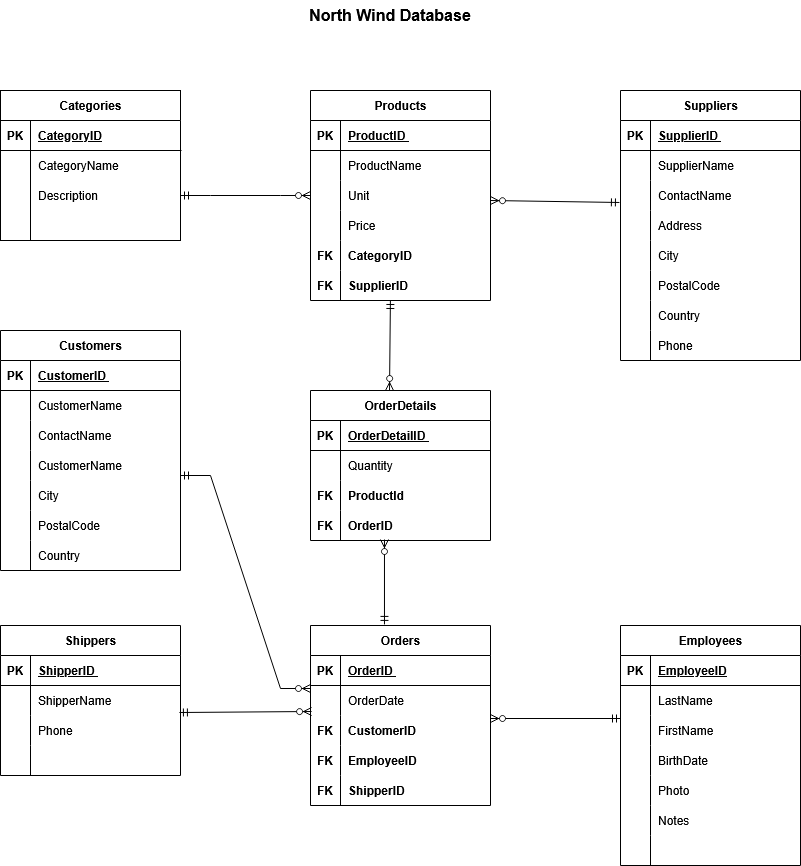

##Installér nødvendige komponenter og indfør diverse opsætninger

In [1]:

pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 32.4 MB/s eta 0:00:00


In [2]:
#Import needed components
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Suppress warnings for this purpose
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Connect to MySQL database
mydb = mysql.connector.connect(
  host="mysql15.unoeuro.com",
  user="jean_zealand_dk",
  password="n25hwtBx9mcEdbar3RGy",
  database="jean_zealand_dk_db"
)

##Tilgå de enkelte tabeller

I denne del af opgaven beskæftiger vi os med udtræk af databasen vha. SQL, der kun vedrører én tabel af gangen på formen `SELECT attrubutliste FROM tabel` - f.eks. `SELECT * FROM Categories`, der udtrækker hele `Categories` tabellen. `*` angiver som bekendt alle attributter. Opret kodecelle til hvert udtræk vha. *+ Code*

###Operationer på enkel tabeller

**Opgaver**:

1.   Udtræk hele `Categories` tabellen (lavet på forhånd)
2.   Udtræk hele `Shippers` tabellen


1.   Udtræk hele `Employees` tabellen, men bergrænset til attributterne `EmployeeID, LastName, FirstName` og `BirthDate`. Sorter udtrækket alfabetisk efter efternavn og derunder fornavn. Hint: Brug `ORDER BY `






In [5]:
query = """
SELECT * FROM Categories
"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryID,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


###Fordelinger & Bar charts

Denne gruppe af opgaver omhandler udtræk af én tabel af gangen med efterfølgende visning af hyppighedsfordelinger i bar charts.

**Opgaver**:


1.   Lav et udtræk af `Customers` tabellen: Alle rækker skal være med og `Country` attibutten skal også være med. Lav herefter en celle med Python-kode, der genererer et bar chart med fordelinger af hyppigheder af kunder pr. land - som vist i eksemplet  herunder.
2.   Etabler også en kodeceller, der genererer et tilsvarende diagram for leverandører. Dvs. at du skal starte med et udtræk af `Suppliers` tabellen.


1.   Lav et tilsvarende udtræk af `Orders`. `OrderDate` skal være med i udtrækket. Generer et bar chart diagram, der har antallet af ordrer fordelt på måneder.
Hint: Tilføj månedsangivelse til din `DataFrame` vha. `query_result['OrderMonth'] = query_result['OrderDate'].dt.to_period('M')`






Eksempel på bar chart diagram:



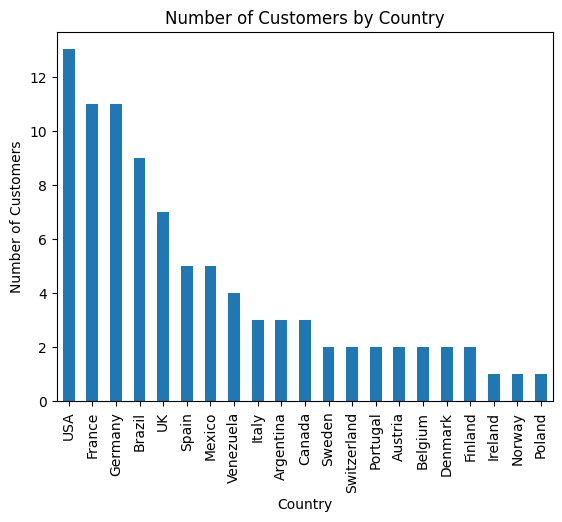

###Frekvenser, histogrammer og fordelinger

Denne gruppe af opgaver omhandler udtræk af én tabel af gangen med efterfølgende visning af hyppighedsfordelinger i histogrammer.

**Opgaver**:


1.   Lav et udtræk af `Products` tabellen: Alle rækker skal være med og `Price` attibutten skal også være med. Lav herefter en celle med Python-kode, der genererer et histogram med fordelinger af prisintervallernes hyppigheder, som vist i eksemplet herunder.
2.   Lav herefter en kodecelle, hvor `describe()` metoden bliver kaldt på `Price` attributen - f.eks. `query_result[["Price"]].describe()`
1.   Forklar i en tekstcelle, hvad vi kan udlede af den information, som `describe()` metoden returnerer.
1.   Gentag ovenstående 3 trin, men nu med `OrderDetails` tabellen og med histogram på `Quantity` attributten.









Eksempel på histogram:

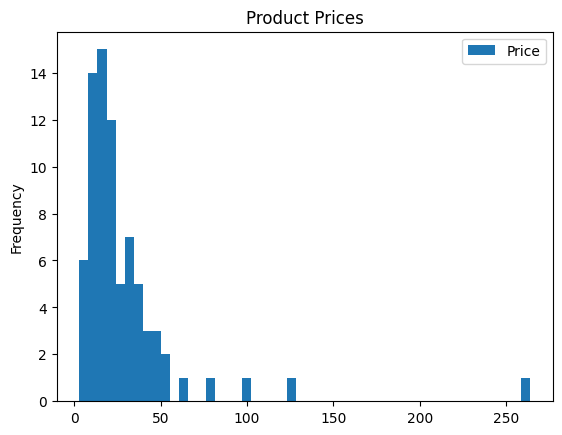

##Relationer mellem tabeller

I denne del af opgaven beskæftiger vi os med:

*   Udtræk af databasen vha. SQL JOIN, der vedrører 2 tabeller af gangen på formen `SELECT attrubutliste FROM tabel JOIN ...`
*   Krydstabuleringer
*   samt scatter plots og korellation










###SQL Join: Categories - Products

**Opgaver**:


1.   Lav et samlet udtræk på `Categories` og `Products` tabellerne ved at lave en `JOIN` på deres fælles `CategoryID` som er henholdsvis primary key (PK) og foreing key (FK) i de 2 tabeller (vist herunder).
2.   Forklar i en tekst celle, hvad udtrækket viser.



In [6]:
query = """
SELECT CategoryName,ProductName,Unit,Price
FROM Categories
JOIN Products ON Categories.CategoryID=Products.CategoryID
"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryName,ProductName,Unit,Price
0,Beverages,Chais,10 boxes x 20 bags,18.0
1,Beverages,Chang,24 - 12 oz bottles,19.0
2,Beverages,Guaraná Fantástica,12 - 355 ml cans,5.0
3,Beverages,Sasquatch Ale,24 - 12 oz bottles,14.0
4,Beverages,Steeleye Stout,24 - 12 oz bottles,18.0
...,...,...,...,...
72,Seafood,Jack's New England Clam Chowder,12 - 12 oz cans,10.0
73,Seafood,Røgede sild,1k pkg.,10.0
74,Seafood,Spegesild,4 - 450 g glasses,12.0
75,Seafood,Escargots de Bourgogne,24 pieces,13.0


###SQL JOIN: Suppliers - Products

**Opgaver**:

1.   Lav et samlet udtræk på `Suppliers` og `Products` tabellerne ved at lave en `JOIN` på deres fælles nøgleattribut. Begræns udtrækket til attributterne `ProductName,Unit,Price,SupplierName`
2.   Forklar i en tekst celle, hvad udtrækket viser.

###SQL JOIN: Orders - OrderDetails

Opgaver:

1.   Lav et samlet udtræk på `Orders` og `OrderDetails` tabellerne ved at lave en `JOIN` på deres fælles nøgleattribut.
2.   Forklar i en tekst celle, hvad udtrækket viser.

###Krydstabulering: Customers - Orders

**Opgaver**:

1.   Lav et samlet udtræk på `Orders` og `OrderDetails` tabellerne ved at lave en JOIN på deres fælles nøgleattribut. I udtrækket skal du som minimum have atttributten `Country` og den beregnede attribut `YEAR(OrderDate) AS Year` med.
2.   Lav en krydstabullering på `Country` og `Year` vha. `crosstab(...)` metoden
1.   Forklar i en tekst celle, hvad krydstabuleringen viser.





    



###Krydstabulering: Shippers - Orders

**Opgaver**:

1.   Lav et samlet udtræk på `Shippers` og `Orders` tabellerne ved at lave en JOIN på deres fælles nøgleattribut. I udtrækket skal du som minimum have atttributten `ShipperName` og den beregnede attribut `YEAR(OrderDate) AS Year`
2.   Lav en krydstabullering på `ShipperName` og `Year` vha. `crosstab(...)` metoden
1.   Forklar i en tekst celle, hvad krydstabuleringen viser.

###Krydstabulering: Employees - Orders

**Opgaver**:

1.   Lav et samlet udtræk på `Employees` og `Orders` tabellerne ved at lave en JOIN på deres fælles nøgleattribut. I udtrækket skal du som minimum have atttributten `FirstName` samt de beregnede attribututer `MONTH(OrderDate) AS Month` og `YEAR(OrderDate) AS Year`. Begræns udtrækket til et enkelt år (`Year`)
2.   Lav en krydstabullering på `FirstName` og `Month` vha. `crosstab(...)` metoden
1.   Forklar i en tekst celle, hvad krydstabuleringen viser.

###Scatter plots & Korrelation: Products - OrderDetails



**Opgaver**:

1.   Lav et samlet udtræk på `OrderDetails` og `Products` tabellerne ved at lave en `JOIN` på deres fælles nøgleattribut. I udtrækket skal du som minimum have attributterne `Quantity` og `Price` samt den beregnede attribut `(Price * Quantity) AS Revenue`. Sidstnævnte er omsætningen på en konkret fakturalinie i en ordre.
2.   Lav et scatter plot på udtrækket med `scatter_matrix(...)` metoden
1.   Beregn korrellations koefficienterne med `corr(...)` metoden  
2.   Konkluder på scatter plottet og korrellationenerne i en tekst celle.





    
   


##Omsætning

Denne del af opgaverne er bygget op omkring tabellerne `OrderDetails` og  `Products`, hvorfra omsætningen på den enkelte ordrelinie kan beregnes: `Price*Quantity`. Men du skal have flere tabeller `JOIN`'et på for at løse opgaverne.

###Omsætning pr. kategori

**Opgaver**:

1.   Lav et udtræk, der viser omsætning pr. kategori (løsning vist herunder)
2.   Generer det tilsvarende bar chart (løsning vist herunder)



In [7]:
query = """
SELECT Categories.CategoryID, CategoryName ,Sum(Price*Quantity) AS Revenue
FROM OrderDetails
JOIN Products ON Products.ProductID=OrderDetails.ProductID
JOIN Categories ON Categories.CategoryID=Products.CategoryID
GROUP BY Products.CategoryID
ORDER BY Products.CategoryID
;"""
query_result = pd.read_sql(query,mydb)
query_result

,CategoryID,CategoryName,Revenue
0,1,Beverages,99699.0
1,2,Condiments,35024.0
2,3,Confections,54729.0
3,4,Dairy Products,70530.0
4,5,Grains/Cereals,22370.0
5,6,Meat/Poultry,51636.0
6,7,Produce,23439.0
7,8,Seafood,29639.0


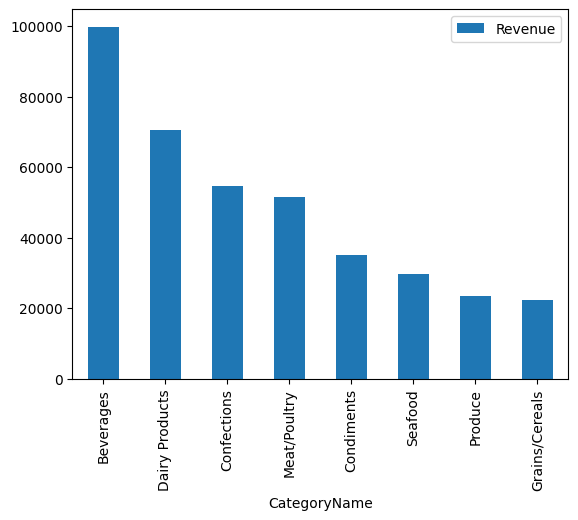

In [8]:
{
    query_result
    .sort_values('Revenue', ascending=False)
    .plot(kind='bar', x='CategoryName', y='Revenue')
};

###Omsætning pr. leverandør

**Opgaver**:

1.   Lav et udtræk, der viser omsætning pr. leverandør
2.   Generer det tilsvarende bar chart



    
    



###Omsætning pr. kunde

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. kunde
2.   Generer det tilsvarende bar chart

###Omsætning pr. medarbejder

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. medarbejder
2.   Generer det tilsvarende bar chart

###Omsætning pr. produkt

Opgaver:
1.   Lav et udtræk, der viser omsætning pr. produkt

###Omsætning pr. måned

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. måned
2.   Generer det tilsvarende bar chart

###Omsætningsfordeling pr. måned på kategorier

**Opgaver**:
1.   Lav et udtræk, der viser omsætning pr. kunde
2.   Generer det tilsvarende pie der viser fordelingen

Hint: [How to create pie chart from pandas dataframe/](https://www.geeksforgeeks.org/python/how-to-create-pie-chart-from-pandas-dataframe/)

##Database struktur

**Opgaver**:



1.   Forklar database-strukturen.
1.   Lever database-strukturen jf. ER-diagrammet op til de forretningsmæssige behov, som du forestiller dig det?
2.   Redefiner database-strukturen/ER-diagrammet, så flere medarbejderer kan være involveret i en ordre.
1.   Er det hensigsmæssigt, at den pris (Price), der angives i en ordre (OrderDetails) er defineret via prisen for produktet (Products)?




